In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
# Dataframe.pivot_table, index= groups columns in the index row, aggfunc= accepts aggregation funcs mean, median,etc, values= column/s to aggregate, columns= values to group by in columns

df.pivot_table(index='job_country', aggfunc='median', values=['salary_year_avg'], columns='job_title_short')

salary_year_avg                                            \
job_title_short Business Analyst Cloud Engineer Data Analyst Data Engineer   
job_country                                                                  
Albania                      NaN            NaN     49950.00           NaN   
Algeria                      NaN            NaN     44100.00       45000.0   
Argentina                71100.0       197500.0     92771.75       96773.0   
Armenia                      NaN            NaN    100500.00       48750.0   
Australia                70000.0       110000.0    109500.00      106712.5   
...                          ...            ...          ...           ...   
Uruguay                      NaN            NaN    100500.00           NaN   
Uzbekistan                   NaN            NaN          NaN           NaN   
Vietnam                  79200.0            NaN     75550.00       96773.0   
Zambia                       NaN            NaN          NaN           NaN   
Zimbabwe                     NaN            NaN     63000.00           NaN   

                                                                              \
job_title_short Data Scientist Machine Learning Engineer Senior Data Analyst   
job_country                                                                    
Albania               69981.25                       NaN                 NaN   
Algeria                    NaN                       NaN                 NaN   
Argentina             71000.00                  101029.0                 NaN   
Armenia                    NaN                   87021.0                 NaN   
Australia            139216.00                  101029.0             50640.0   
...                        ...                       ...                 ...   
Uruguay                    NaN                   50000.0                 NaN   
Uzbekistan            30750.00                       NaN                 NaN   
Vietnam               70000.00                   57600.0            105837.5   
Zambia                90670.00                       NaN                 NaN   
Zimbabwe              69085.00                       NaN                 NaN   

                                                                              
job_title_short Senior Data Engineer Senior Data Scientist Software Engineer  
job_country                                                                   
Albania                          NaN              157500.0               NaN  
Algeria                          NaN                   NaN               NaN  
Argentina                   147500.0                   NaN          174500.0  
Armenia                          NaN                   NaN               NaN  
Australia                   147500.0              157500.0          118350.0  
...                              ...                   ...               ...  
Uruguay                          NaN               57500.0               NaN  
Uzbekistan                       NaN                   NaN               NaN  
Vietnam                     147500.0               79200.0           53600.0  
Zambia                           NaN                   NaN               NaN  
Zimbabwe                         NaN                   NaN               NaN  

[108 rows x 10 columns]

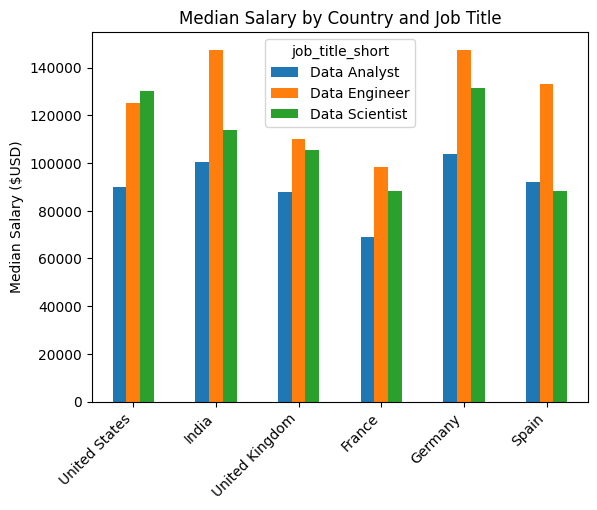

In [4]:
# Preparing for plot table

top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg', index='job_country', columns='job_title_short', aggfunc='median')

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
# Style
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

# Practice Problems

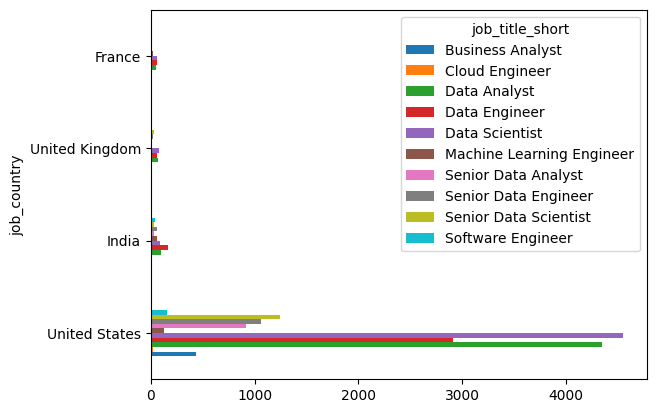

In [37]:
country = df['job_country'].value_counts().head(4).index
prac1 = df.pivot_table(index='job_country', columns='job_title_short', aggfunc='count', values='salary_year_avg', dropna='salary_year_avg')
prac1 = prac1.loc[country]
prac1.plot(kind='barh')
plt.show()

In [50]:
# df.groupby('job_title_short')['salary_year_avg'].describe()

#roles = ['Data Analyst','Data Scientist','Machine Learning Engineer']
df.pivot_table(index='job_title_short', values='salary_year_avg', aggfunc=['min','median','max'])
#stats = stats.loc[roles]
#stats.plot(kind='bar')
#plt.show()

,min,median,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Business Analyst,16500.0,85000.0,387460.0
Cloud Engineer,42000.0,90000.0,280000.0
Data Analyst,25000.0,90000.0,650000.0
Data Engineer,15000.0,125000.0,525000.0
Data Scientist,27000.0,127500.0,960000.0
Machine Learning Engineer,30000.0,106415.0,325000.0
Senior Data Analyst,30000.0,111175.0,425000.0
Senior Data Engineer,35000.0,147500.0,425000.0


In [56]:
top_country = df['job_country'].value_counts().head(5).index

sumsal = df.pivot_table(index='job_country', columns='job_title_short', values='salary_year_avg', aggfunc='sum', dropna='salary_year_avg')

sumsal = sumsal.loc[top_country]

sumsal

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,4.145162e+07,2401818.0,4.113097e+08,3.912708e+08,6.371774e+08,19742769.0,1.056607e+08,1.602320e+08,1.977291e+08,2.166049e+07
India,6.580410e+05,0.0,9.320093e+06,2.083979e+07,1.087474e+07,6348236.5,2.854996e+06,7.532472e+06,4.159181e+06,3.528917e+06
United Kingdom,2.478000e+05,0.0,6.437586e+06,6.937332e+06,8.268820e+06,976951.0,8.585150e+05,3.301200e+06,4.011376e+06,5.164000e+05
France,2.434750e+05,105968.0,4.078772e+06,7.175764e+06,5.648892e+06,1549109.0,1.251592e+06,2.035073e+06,1.280700e+06,1.399918e+06
Germany,8.748500e+05,837250.0,4.875027e+06,5.080760e+06,4.807670e+06,4441430.0,1.493352e+06,3.316373e+06,3.123300e+06,9.107330e+05
